In [48]:
#coding=utf-8
%matplotlib inline
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm
import matplotlib as mpl
# font_path = "/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc"
# prop = mfm.FontProperties(fname=font_path)
# mpl.rcParams['font.sans-serif'] = ['wqy-zenhei']
# mpl.rcParams['font.family'] ='sans-serif'
mpl.rcParams['font.sans-serif'] = ['Heiti TC']


# load data and split feature and label
df = pd.read_csv('data/hk_ipo_feature_engineered.csv', sep='\t', index_col='code', encoding='utf-8')
Y = df['chg_on_debut']
X = df.drop('chg_on_debut', axis = 1)
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
eval_set = [(X_test, y_test)]


0.09255899872496376


<AxesSubplot:>

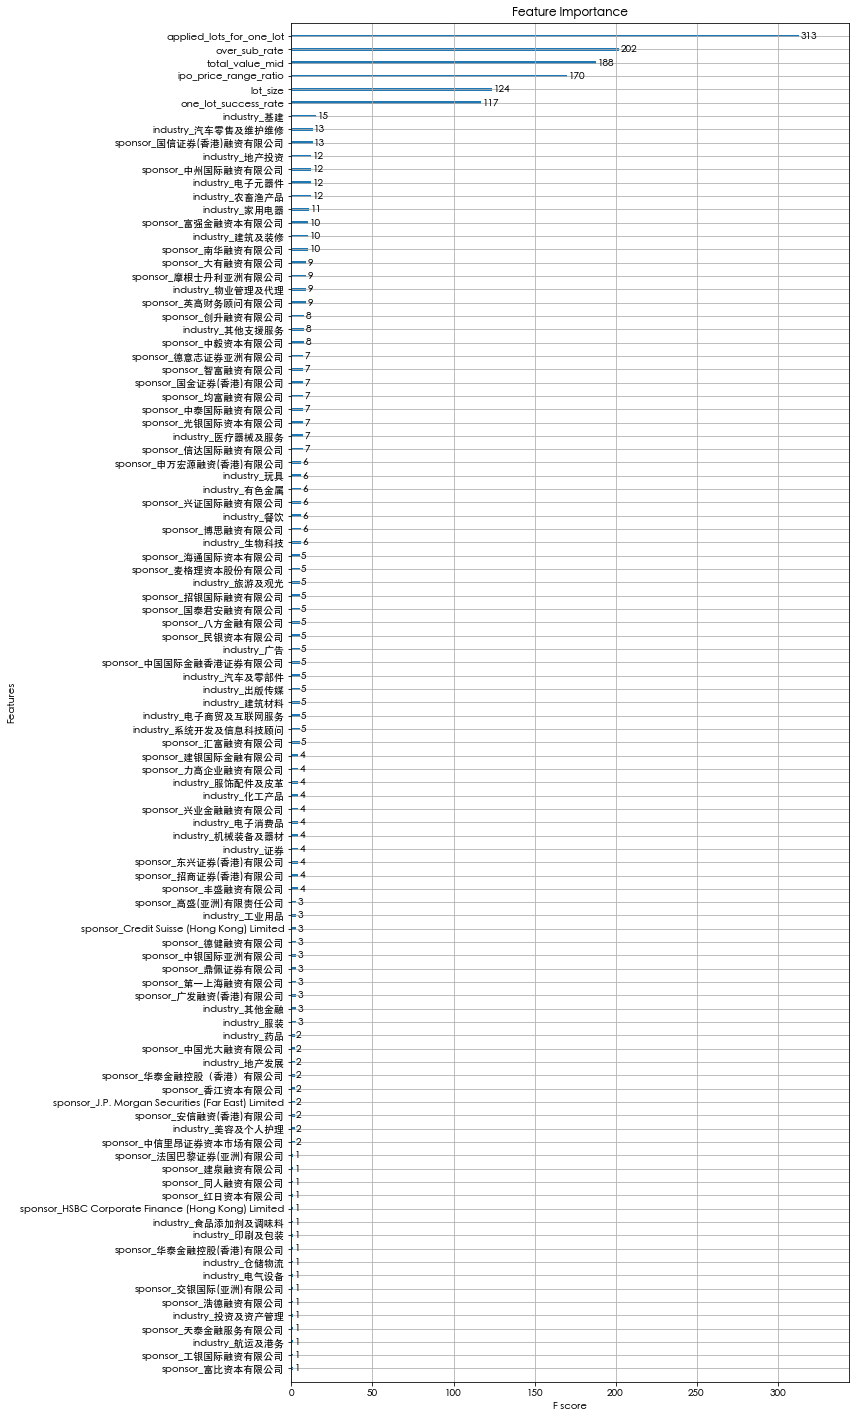

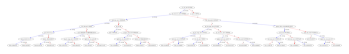

In [49]:
# fit model no training data
xgb_model = xgb.XGBRegressor().fit(X_train,y_train)
predictions = xgb_model.predict(X_test)
actuals = y_test
print(mean_squared_error(actuals, predictions))

fig, ax = plt.subplots(1,1,figsize=(10, 25))
xgb.plot_importance(xgb_model, ax = ax)
xgb.plot_tree(xgb_model, num_trees=2)

In [67]:
importance = xgb_model.get_booster().get_score(importance_type='weight')
tuples = [(k, importance[k]) for k in importance]
with open('machine_learning/feature_importance', 'w') as f:
    for item in tuples:
        f.write(item[0] + "\t" + str(item[1]))
        f.write("\n")

'/Users/luyunbo/PycharmProjects/hk_ipo_prediction/env/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'